## In this file, I would prepare data from Bakery.csv for model creation 

In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [29]:
data = pd.read_csv("Bakery.csv")
data.head(2)

,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue,month,day,day_of_week,time,part_of_day
0,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone,3.00,January,1,Sunday,7,morning
1,1,5,Lower Manhattan,79,3.75,Bakery,Scone,Jumbo Savory Scone,3.75,January,1,Sunday,7,morning


In [30]:
#Obviously drop time column, as we would use part_of_day as parameter. 
#Product id, store id and transaction qty also can be dropped
data = data.drop(["transaction_qty", "store_id", "product_id", "time"], axis= 1)

In [31]:
data.columns

Index(['store_location', 'unit_price', 'product_category', 'product_type',
       'product_detail', 'revenue', 'month', 'day', 'day_of_week',
       'part_of_day'],
      dtype='object')

In [32]:
#Encoding categorical data 
from sklearn.preprocessing import OneHotEncoder


In [33]:
enc = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
enc_stores = enc.fit_transform(data[["store_location"]])
data = pd.concat([data, enc_stores], axis = 1).drop(["store_location"], axis = 1)
data = data.drop("store_location_Lower Manhattan", axis = 1)
data.columns

Index(['unit_price', 'product_category', 'product_type', 'product_detail',
       'revenue', 'month', 'day', 'day_of_week', 'part_of_day',
       'store_location_Astoria', 'store_location_Hell's Kitchen'],
      dtype='object')

In [34]:
enc_month = enc.fit_transform(data[["month"]])
data = pd.concat([data, enc_month], axis = 1).drop(["month"], axis = 1)
data = data.drop("month_May", axis = 1)
data.columns


Index(['unit_price', 'product_category', 'product_type', 'product_detail',
       'revenue', 'day', 'day_of_week', 'part_of_day',
       'store_location_Astoria', 'store_location_Hell's Kitchen',
       'month_April', 'month_February', 'month_January', 'month_June',
       'month_March'],
      dtype='object')

In [35]:
enc_part_of_day = enc.fit_transform(data[["part_of_day"]])
data = pd.concat([data, enc_part_of_day], axis = 1).drop(["part_of_day"], axis = 1)
data = data.drop("part_of_day_evening", axis = 1)
data.columns

Index(['unit_price', 'product_category', 'product_type', 'product_detail',
       'revenue', 'day', 'day_of_week', 'store_location_Astoria',
       'store_location_Hell's Kitchen', 'month_April', 'month_February',
       'month_January', 'month_June', 'month_March', 'part_of_day_lunch',
       'part_of_day_morning'],
      dtype='object')

In [36]:
enc_day_of_week = enc.fit_transform(data[["day_of_week"]])
data = pd.concat([data, enc_day_of_week], axis = 1).drop(["day_of_week"], axis = 1)
data = data.drop("day_of_week_Sunday", axis = 1)
data.columns

Index(['unit_price', 'product_category', 'product_type', 'product_detail',
       'revenue', 'day', 'store_location_Astoria',
       'store_location_Hell's Kitchen', 'month_April', 'month_February',
       'month_January', 'month_June', 'month_March', 'part_of_day_lunch',
       'part_of_day_morning', 'day_of_week_Friday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday'],
      dtype='object')

In [37]:
data.head(2)

,unit_price,product_category,product_type,product_detail,revenue,day,store_location_Astoria,store_location_Hell's Kitchen,month_April,month_February,...,month_June,month_March,part_of_day_lunch,part_of_day_morning,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,3.00,Bakery,Scone,Oatmeal Scone,3.00,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.75,Bakery,Scone,Jumbo Savory Scone,3.75,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
products = []
for product in data["product_detail"].unique():
    products.append(product)

print(products)


['Oatmeal Scone', 'Jumbo Savory Scone', 'Hazelnut Biscotti', 'Chocolate Chip Biscotti', 'Chocolate Croissant', 'Scottish Cream Scone ', 'Ginger Biscotti', 'Ginger Scone', 'Cranberry Scone', 'Almond Croissant', 'Croissant']


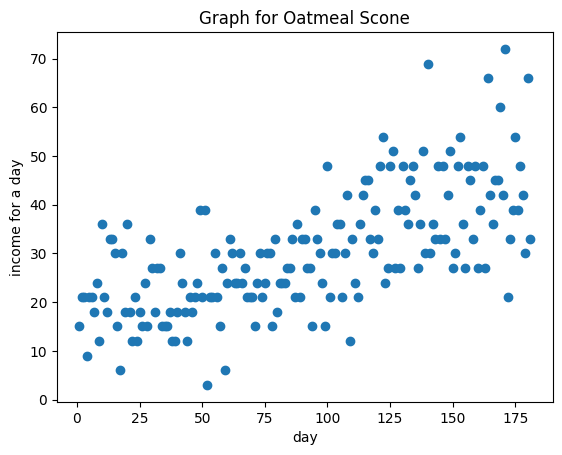

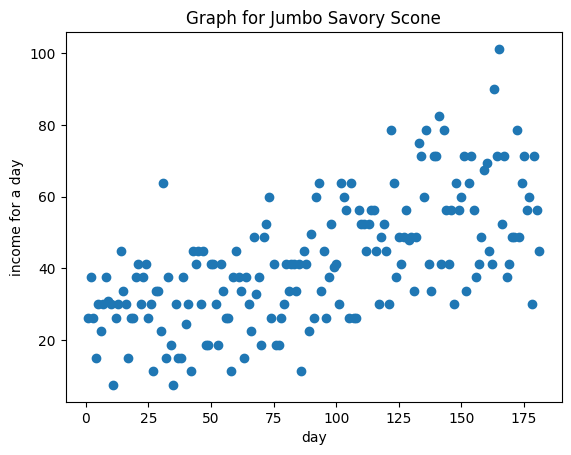

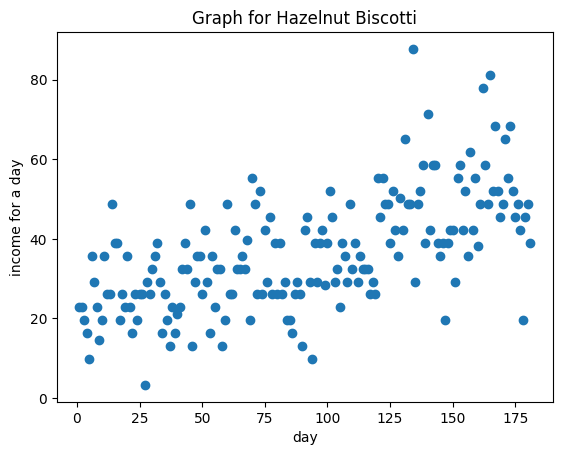

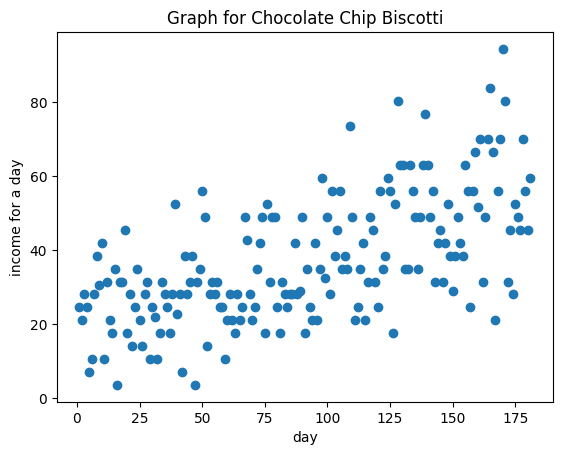

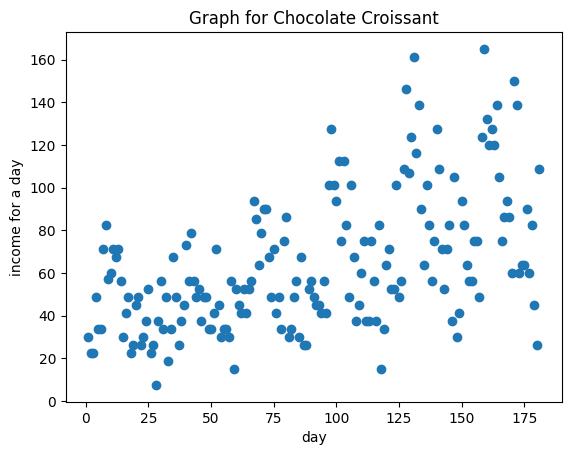

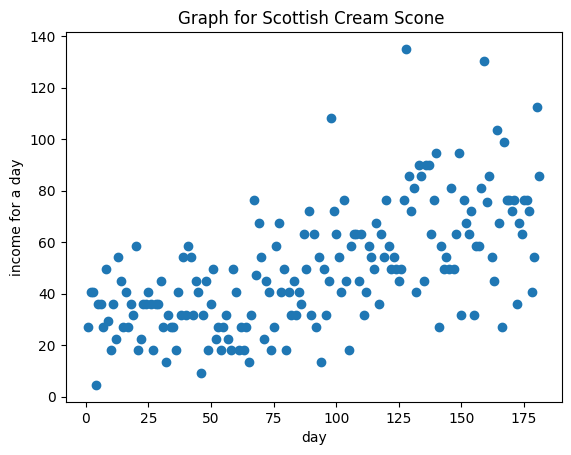

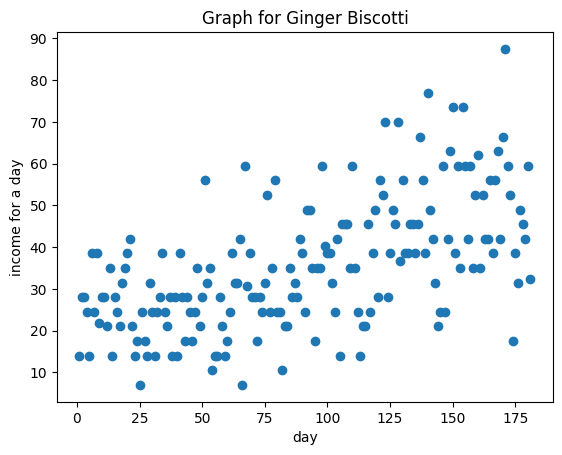

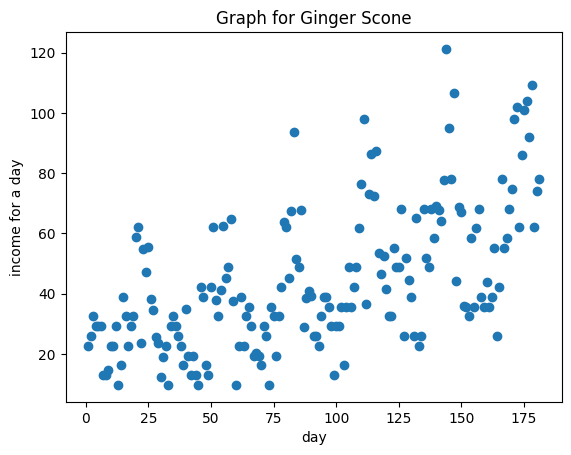

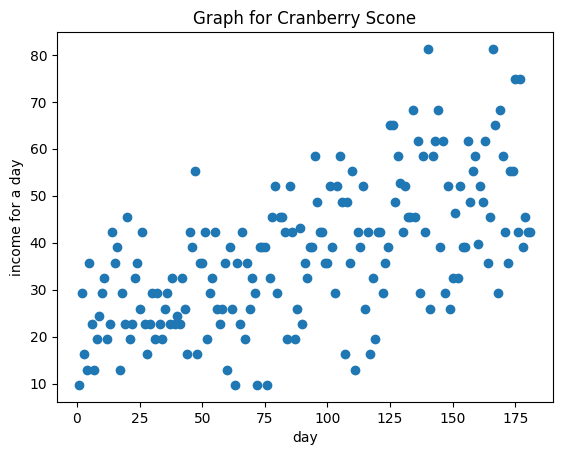

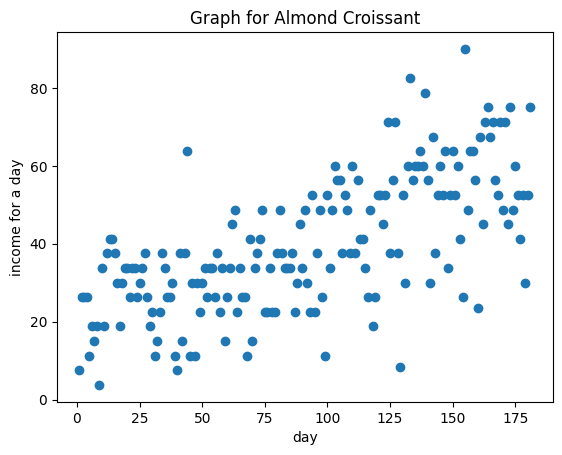

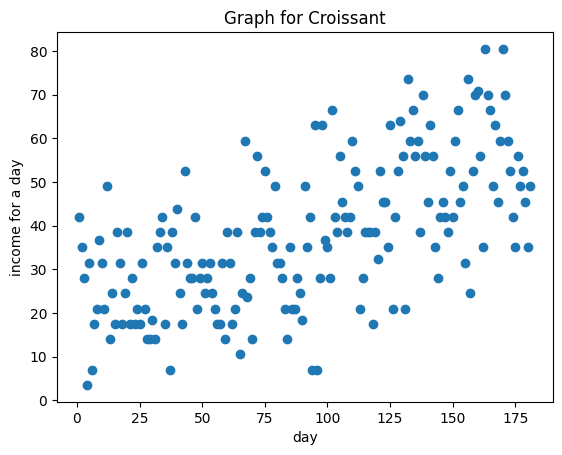

In [43]:
for product in products: 
 df = data[data["product_detail"] == product]
 daily_revenue = df.groupby("day")["revenue"].sum()
 plt.scatter(daily_revenue.index, daily_revenue.values)
 plt.title(f"Graph for {product}")
 plt.xlabel("day")
 plt.ylabel("income for a day")
 plt.show()




In [41]:
for product in products: 
 temp = data[data["product_detail"] == product]
 temp.to_csv(f"{product}.csv", index=False)